In [1]:
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the fashion MNIST dataset
(x_train, _), (_, _) = keras.datasets.fashion_mnist.load_data()

# Normalise the data
x_train = x_train / 255.0

# Add an extra dimension
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)


4431872/4422102 [==============================] - 0s 0us/step


In [3]:
# Create a convolutional autoencoder

model = keras.models.Sequential()

model.add(keras.layers.InputLayer(input_shape=(28, 28, 1)))

# Encoder
model.add(keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(pool_size=2))

# Decoder
model.add(keras.layers.UpSampling2D())
model.add(keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.UpSampling2D())
model.add(keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mse')
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                        

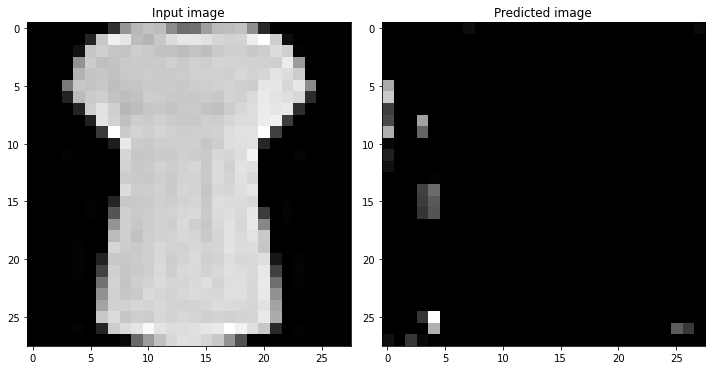

In [4]:
def show_prediction(img, model):
    """Shows the predicted output of the model

    Args:
        img: The input image
        model: The Keras model
    """

    # Predict the image
    img = img.reshape(1, 28, 28, 1)
    prediction = model.predict(img)

    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    # Plot the image
    ax[0].imshow(img[0, :, :, 0], cmap='gray')
    ax[0].set_title('Input image')
    # Plot the predicted image
    ax[1].imshow(prediction[0, :, :, 0], cmap='gray')
    ax[1].set_title('Predicted image')
    plt.tight_layout()

id = np.random.randint(low = 0, high = x_train.shape[0])
show_prediction(x_train[id], model)

In [5]:
history = model.fit(x_train, x_train, 
        validation_split=0.2,
        epochs=5,
        batch_size=256)

Epoch 1/5
188/188 [==============================] - 11s 47ms/step - loss: 0.0224 - val_loss: 0.0108
Epoch 2/5
188/188 [==============================] - 8s 43ms/step - loss: 0.0091 - val_loss: 0.0078
Epoch 3/5
188/188 [==============================] - 9s 47ms/step - loss: 0.0070 - val_loss: 0.0065
Epoch 4/5
188/188 [==============================] - 8s 44ms/step - loss: 0.0058 - val_loss: 0.0054
Epoch 5/5
188/188 [==============================] - 8s 44ms/step - loss: 0.0052 - val_loss: 0.0058


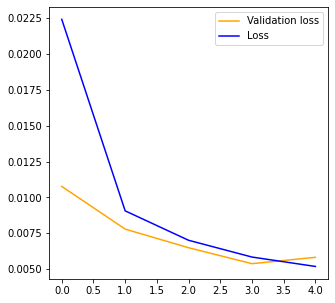

In [6]:
fig, ax = plt.subplots(1, 1, figsize = (5, 5))
ax.plot(history.history['val_loss'], color="orange", label="Validation loss")
ax.plot(history.history['loss'], color="blue", label="Loss")
ax.legend()
plt.show()

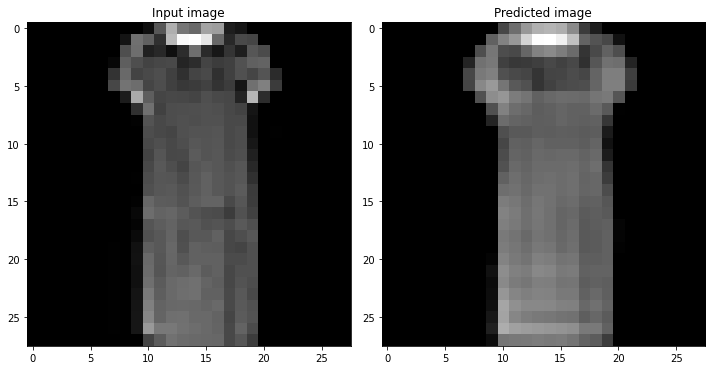

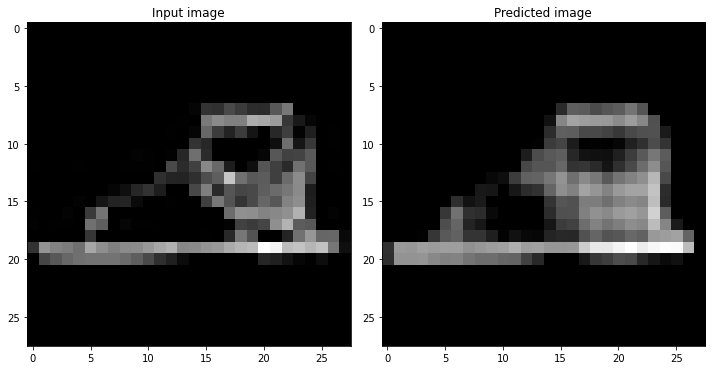

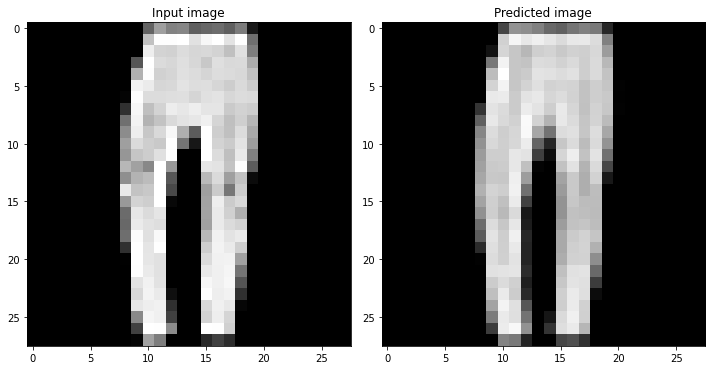

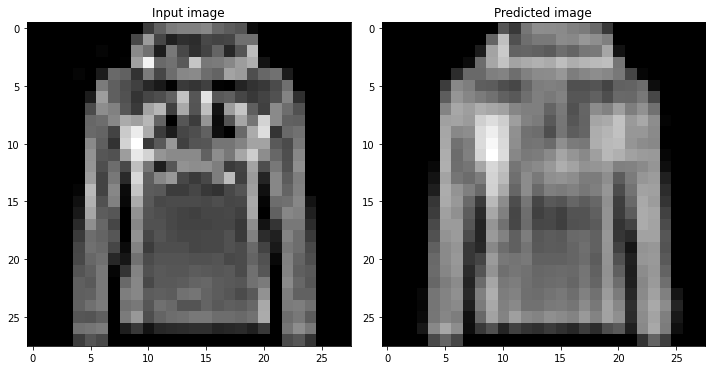

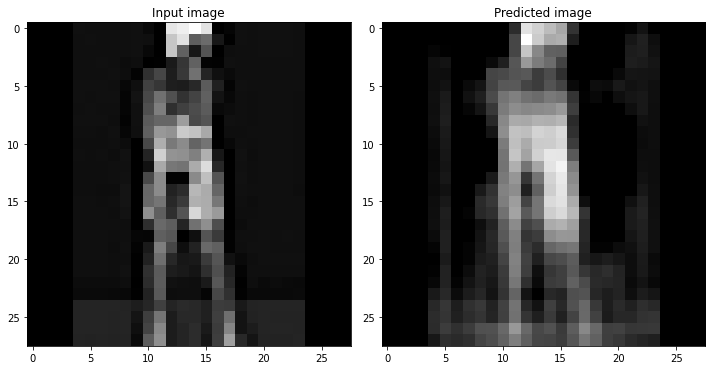

In [7]:
id = np.random.randint(low = 0, high = x_train.shape[0], size = 5)

for i in id:
    show_prediction(x_train[i], model)

Train for another 5 epochs

In [8]:
history = model.fit(x_train, x_train, 
        validation_split=0.2,
        epochs=5,
        batch_size=256)

Epoch 1/5
188/188 [==============================] - 8s 45ms/step - loss: 0.0047 - val_loss: 0.0044
Epoch 2/5
188/188 [==============================] - 8s 44ms/step - loss: 0.0043 - val_loss: 0.0041
Epoch 3/5
188/188 [==============================] - 8s 44ms/step - loss: 0.0041 - val_loss: 0.0039
Epoch 4/5
188/188 [==============================] - 8s 44ms/step - loss: 0.0039 - val_loss: 0.0038
Epoch 5/5
188/188 [==============================] - 8s 44ms/step - loss: 0.0037 - val_loss: 0.0036


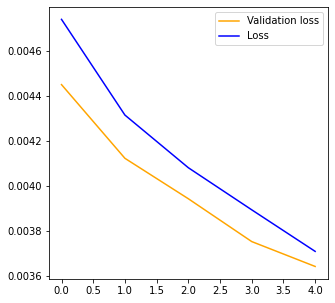

In [9]:
fig, ax = plt.subplots(1, 1, figsize = (5, 5))
ax.plot(history.history['val_loss'], color="orange", label="Validation loss")
ax.plot(history.history['loss'], color="blue", label="Loss")
ax.legend()
plt.show()

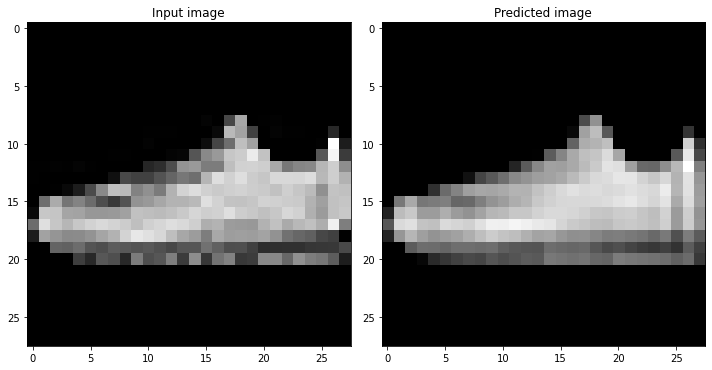

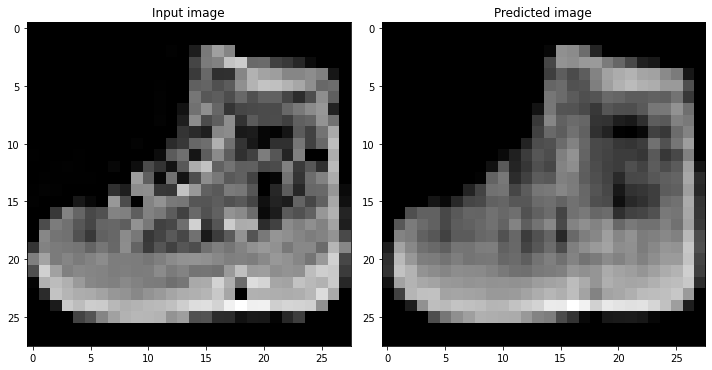

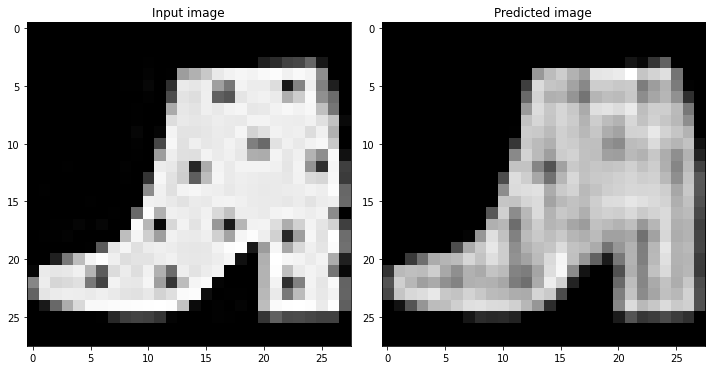

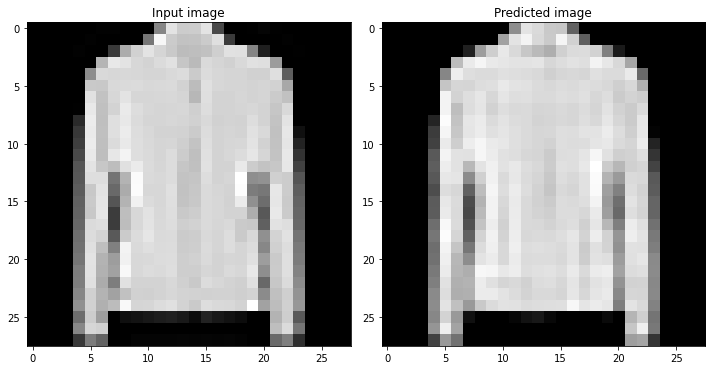

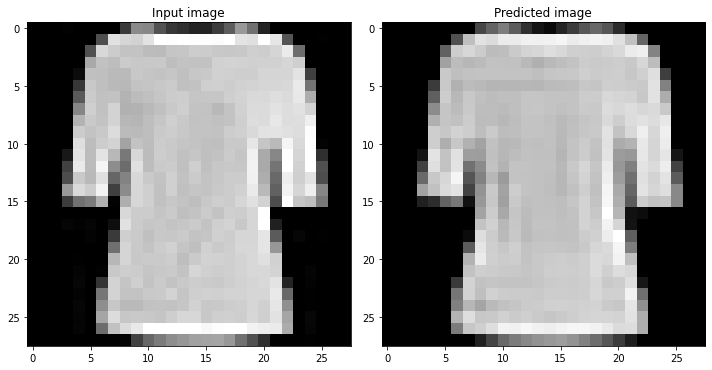

In [10]:
id = np.random.randint(low = 0, high = x_train.shape[0], size = 5)

for i in id:
    show_prediction(x_train[i], model)

Can we visualize the latent space?

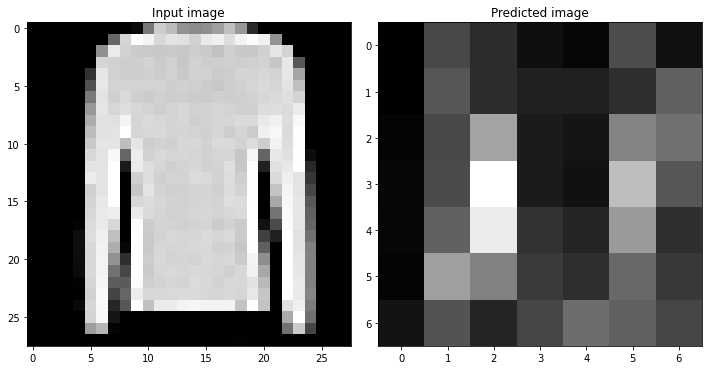

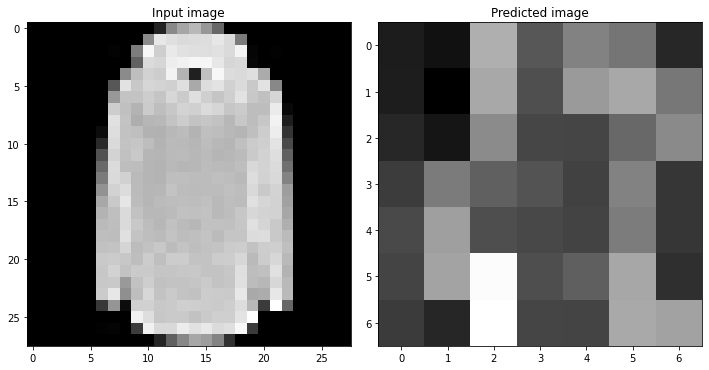

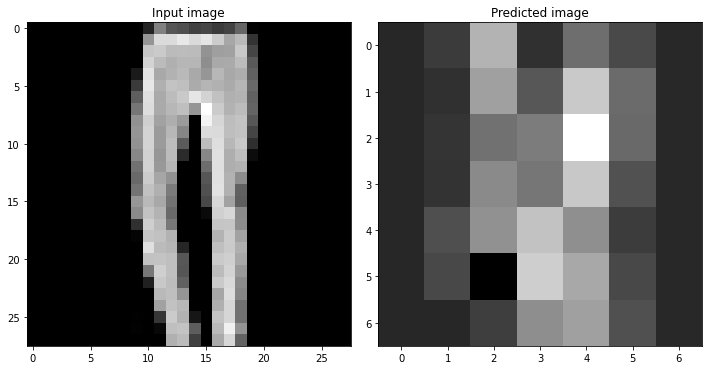

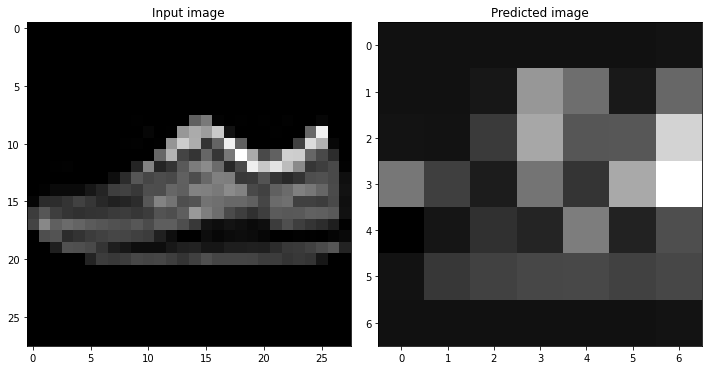

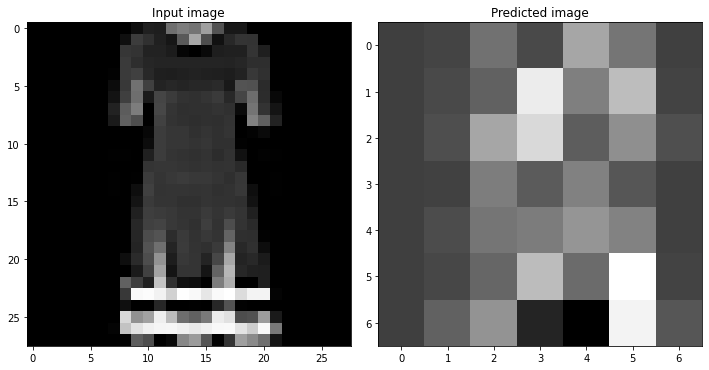

In [21]:
# Take the encoder part only

encoder = keras.Model(inputs=model.input,
                      outputs=model.get_layer("max_pooling2d_1").output)

id = np.random.randint(low = 0, high = x_train.shape[0], size = 5)

for i in id:
    show_prediction(x_train[i], encoder)